<a href="https://colab.research.google.com/github/tiagosardi/optimizationMethod/blob/main/algoritmosGulosos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/tiagosardi/optimizationMethod.git
#import sys
#sys.path.append('/content/optimizationMethod/')


Cloning into 'optimizationMethod'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 52 (delta 24), reused 14 (delta 4), pack-reused 0
Unpacking objects: 100% (52/52), done.


#Configuração de um problema

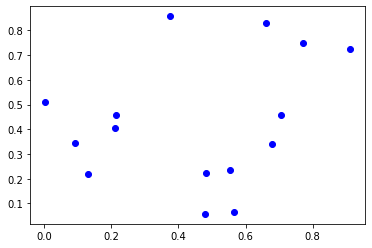

In [45]:

n = 15
points = np.random.rand(n,2)

for p in points:
  plt.plot(p[0],p[1],'bo')

In [46]:
dist_matrix = [[np.linalg.norm(np.array(p1)-np.array(p2)) for p1 in points] for p2 in points]


In [ ]:
n = len(points)
V = set(range(len(points)))

#Python MIP

In [47]:
model = Model()


In [48]:
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
y = [model.add_var(var_type=INTEGER,lb=1,ub=n-1) for i in V]

In [49]:
model.objective = minimize(xsum(dist_matrix[i][j]*x[i][j] for i in V for j in V))


In [50]:
for i in V:
  model += xsum(x[i][j] for j in V - {i}) == 1 

for j in V:
  model += xsum(x[i][j] for i in V - {j}) == 1 

for (i, j) in product(V - {0}, V - {0}):
  if i!=j:
    model += y[i] - y[j] + (n+1)*x[i][j] <= n

In [51]:
model.optimize()
model.objective_value

2.947699420976843

In [52]:
for row in x:
  vals = [e.x for e in row]
  print(vals)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1

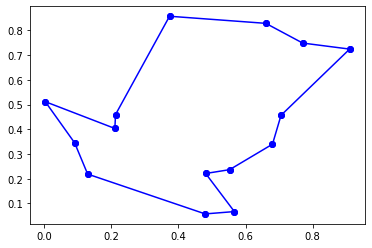

In [53]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

Na busca exaustiva ele gera todas as buscas possíveis e fica com a melhor. A vantagem da busca exaustiva, a gente garante que estamos na melhor solução. A desvantagem está no custo. Outra vantagem é a simplicidade (resolvemos o caixeiro viajante com busca exaustiva pois resolvemos com permutação, sem ciclos e sem restrição), então para problemas pequenos pode ser mais útil usar busca exaustiva. O problema é quando a instância vai crescendo e a busca exaustiva vai se distanciando do modelo mais adequado.

Vamos usar métodos heurísticos desta vez. Heurística é um procedimento aproximado. Não tem garantia de encontrar o ótimo, mas encontraremos uma solução boa com mais rapidez. Existem dois tipos básicos de heurísticas: As construtivas e a heurísticas de refinamento.

As construtivas servem pra gente construir uma solução boa. A rota inicial tem que ser melhor que a aleatória.

Na heuristica de refinamento, nós refinamos uma solução que já temos. 
ENtão combinaremos os dois tipos. Primeiro vamos usar a construtiva e depois refinamento.

A heuristica construtiva mais comum é o algoritmo guloso.

Precisamos primeiro definir a gula desse algoritmo usando uma função h:$\mathbb{Z}$ -> R (a funçao mapeia numeros inteiros num numero real)

Cada iteração o algoritmo escolhe um elemento pra adicionar a solução que tem o maior valor dessa heuristica possível.
ENtão temos o método heuristico e a função heurística.
A funçao vai definir qual a fome desse algoritmo. 

O PROBLEMA DA MOCHILA:
(Knapsack problem)

Nós temos um conjunto de itens I e para cada item nós temos um lucro P (profit) e temos um peso W (weight). 
Cada item que colocamos na mochila, traz um lucro ao ser vendido. Os itens tem pesos e a mochila tem um limite de peso, onde C é a capacidade da mochila.
Precisamos maximizar o lucro e manter a capacidade.
Vamos modelar esse problema como um problema de programação linear:

Temos um vetor de pesos $\bar{P}$ = [40,35,18,4,10,2] e um vetor de pesos $\bar{W}$ = [100,50,45,20,10,5].
Agora, para formular como problema de programação linear, vamos olhar para as variáveis que existem no problema. Não podemos mudar o peso dos itens, mas variamos em quais itens poderemos pegar:

$ Xi \in{\{0,1\}}$ -> indica se o item i está na mochila.

$\bar{x} = [0,0,1,0,1,0]$ Temos 6 itens, então um vetor com 6 posições, onde colocamos os itens 2 e 4 na mochila e os demais não foram adicionados a mochila.

$$ max \Sigma{Xi * Pi} $$
$$ \Sigma{Xi*Wi} <= C$$
$$ Xi \in{\{0,1\}} $$

Resolvendo com o Python MIP

In [59]:
!pip install mip

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mip import Model, xsum, maximize, minimize, BINARY, INTEGER
from itertools import product
from sys import stdout as out

In [61]:
p = [45,35,18,4,10,2]
w = [100,50,45,20,10,5]
c = 100
n = len(p)

In [62]:
# vamos definir o modelo
m = Model('Knapsack')


In [63]:
# para definir a funcao objetivo, precisamos das variaveis
x = [m.add_var(var_type=BINARY) for i in range(n)] # as variaveis tem tipo binario

#funcao objetivo
m.objective= maximize(xsum(x[i]*p[i] for i in range(n)))

#a unica restricao que temos
m += xsum(x[i] *w[i] for i in range(n)) <= c


In [64]:
m.optimize() #otimiza e busca pela solucao otima

<OptimizationStatus.OPTIMAL: 0>

A python mip usa um método que não tem precisão infinita, então resolve com uma determinada precisão para o ótimo.


In [65]:
print([x[i].x for i in range(n)])

[0.0, 1.0, 1.0, 0.0, 0.0, 1.0]


In [66]:
#os itens que ele selecionou sao os itens que tem valor >=.99 
# serve para resolver o problema da precisao da python mip para colocar valores reais

selected = [i for i in range(n) if x[i].x >= .99]
selected

[1, 2, 5]

[1,2,5] é a solução ótima desse problema. 

Podemos resolver esse problema utilizando força bruta também (ver brute force no meu github).

Para adicionar a restrição nesse caso, podemos fazer com que valores que infrinjam a restrição, se tornem as piores soluções, a assim possam ser ignoradas.



In [67]:


def brute_force(fobj,n,m,partial_solution=[], best_solution=[], best_val=np.inf, print_sol=False):
  #np.inf = infinito
  
  
  #comeca com criterio de parada
  if len(partial_solution) ==n:
    fx = fobj(partial_solution) #coloquei o valor da ultima variavel em fx
    if print_sol:
      print('{} : {}'.format(partial_solution, fx))
    if fx <=best_val:
      best_solution = partial_solution
      best_val = fx
    return best_solution, best_val
  else:
    for e in set(np.arange(m)): #transforma em conjunto a partir do set para usar operacoes de conjuntos e descontar as repeticoes, tornando o algoritmo em permutacao
      best_sol, best_val = brute_force(fobj,n,m,partial_solution + [e], 
                  best_solution, 
                  best_val,
                  print_sol)
    return best_sol, best_val


In [68]:
#se nao entrar em nenhuma condicao, entao vai lançar no infinito. Isso fará que condições que violem as restrições, sempre percam, indo para infinito
#repare que uso -np.sum para utilizar como maximizacao, ja que o metodo usado é para minimizacao
fobj = lambda x: -np.sum([x[i]*p[i] for i in range(n)]) if np.sum([x[i]*w[i] for i in range(n)]) <= c else np.inf
best_solution,best_val = brute_force(fobj,n,2,print_sol=True)


[0, 0, 0, 0, 0, 0] : 0
[0, 0, 0, 0, 0, 1] : -2
[0, 0, 0, 0, 1, 0] : -10
[0, 0, 0, 0, 1, 1] : -12
[0, 0, 0, 1, 0, 0] : -4
[0, 0, 0, 1, 0, 1] : -6
[0, 0, 0, 1, 1, 0] : -14
[0, 0, 0, 1, 1, 1] : -16
[0, 0, 1, 0, 0, 0] : -18
[0, 0, 1, 0, 0, 1] : -20
[0, 0, 1, 0, 1, 0] : -28
[0, 0, 1, 0, 1, 1] : -30
[0, 0, 1, 1, 0, 0] : -22
[0, 0, 1, 1, 0, 1] : -24
[0, 0, 1, 1, 1, 0] : -32
[0, 0, 1, 1, 1, 1] : -34
[0, 1, 0, 0, 0, 0] : -35
[0, 1, 0, 0, 0, 1] : -37
[0, 1, 0, 0, 1, 0] : -45
[0, 1, 0, 0, 1, 1] : -47
[0, 1, 0, 1, 0, 0] : -39
[0, 1, 0, 1, 0, 1] : -41
[0, 1, 0, 1, 1, 0] : -49
[0, 1, 0, 1, 1, 1] : -51
[0, 1, 1, 0, 0, 0] : -53
[0, 1, 1, 0, 0, 1] : -55
[0, 1, 1, 0, 1, 0] : inf
[0, 1, 1, 0, 1, 1] : inf
[0, 1, 1, 1, 0, 0] : inf
[0, 1, 1, 1, 0, 1] : inf
[0, 1, 1, 1, 1, 0] : inf
[0, 1, 1, 1, 1, 1] : inf
[1, 0, 0, 0, 0, 0] : -45
[1, 0, 0, 0, 0, 1] : inf
[1, 0, 0, 0, 1, 0] : inf
[1, 0, 0, 0, 1, 1] : inf
[1, 0, 0, 1, 0, 0] : inf
[1, 0, 0, 1, 0, 1] : inf
[1, 0, 0, 1, 1, 0] : inf
[1, 0, 0, 1, 1, 1] : inf
[1, 0

In [69]:
best_solution, best_val
#a melhor solução tem o lucro de 55

([], -55)

IMPLEMENTAÇÃO DO ALGORITMO GULOSO

função h -> fome de q

n -> n de variáveis

c -> capacidade

In [70]:
def greedy_knapsack(h,n,c): 
  sol = [0 for i in range(n)] #primeira solucao preenchida com zeros
  weight = 0 # monitora o peso pra não violarmos a restrição de capacidade
  hs = [h(e) for e in range(n)] #agr construo um vetor pra armazenar o valor da funçao h. A cada iteração ele coloca o item que tem maior h possível
  i=0

  while i<n:
    item = np.argmax(hs) #função argmax fala o indice que tem maior elemento
    weight += w[item] #verifica o peso da mochila ao adicionar o item
    if weight > c:
      #estourou a capacidade
      hs[item] = -np.inf #criado para q o item nao seja mais escolhido
      weight -= w[item] # retiro o item da minha mochila
    else:
      sol[item] = 1 #não estourou, adiciona na mochila
      hs[item] = -np.inf #não será mais escolhido, pois já está na mochila
    
    i+=1
  return sol

In [71]:
#definindo a função h, dando preferencia aos itens com maior lucro
h= lambda e: p[e]

In [72]:
sol = greedy_knapsack(h,n,c)
sol
print('{} P:{}'.format(sol,-fobj(sol)))

[1, 0, 0, 0, 0, 0] P:45


In [73]:
#definindo a função h, dando preferencia aos itens de menor peso (entramos num problema de minimizacao)
h= lambda e: -w[e]

In [74]:
sol = greedy_knapsack(h,n,c)
sol
print('{} P:{}'.format(sol,-fobj(sol)))

[0, 0, 1, 1, 1, 1] P:34


Como pudemos observar, dar preferencia aos itens de menor peso, fez com que eu pudesse colocar mais itens na mochila, no entanto o lucro foi menor, então pioramos a solução

A melhor heurística seria a densidade de lucro (quanto maior o peso, menor é o lucro)

In [75]:
h= lambda e: p[e]/w[e]
sol = greedy_knapsack(h,n,c)
sol
print('{} P:{}'.format(sol,-fobj(sol)))

[0, 1, 0, 1, 1, 1] P:51


QUando a gente usa um algoritmo gulosa, geralmente sobra pouco espaço pra melhorias e tem uma chance de ficarmos preso num mínimo local. COstumamos usar um algoritmo construtivo e um algoritmo de refinamento para convergir para um mínimo local. Quando fazemos isso, temos pouco espaço pra melhoria e podemos cair num minimo local, prematuramente. Para se precaver desse problema, Maurício Resende criou um algoritmo que pudesse ser introduzido uma aleatoriedade no algoritmo de refinamento para que tenha mais trabalho e encontre outras soluções.

In [76]:
def grasp_knapsack(h,n,c, prob=0.4):
  #prob é a probabilidade dele selecionar um aleatorio
  sol = [0 for i in range(n)] 
  weight = 0
  hs = [h(e) for e in range(n)]
  i=0
  #para executar esse algoritmo apenas 40% das vezes, 
  #vamos usar um gerador de numeros aleatorios com distribuiçao uniforme
  while i<n:
    if np.random.rand() <= prob:
      item = np.argmax(hs) #se for menor que a probabilidade, entao executa o algoritmo guloso
    else:
      item = np.random.randint(n) #gera um numero aleatorio entre 0 e n-1, então vai gerar um item aleatório 

 
    weight += w[item] 
    if weight > c:
      
      hs[item] = -np.inf 
      weight -= w[item] 
    else:
      sol[item] = 1 
      hs[item] = -np.inf 
    
    i+=1
  return sol

In [77]:
h= lambda e: p[e]/w[e]
sol = grasp_knapsack(h,n,c, .5)
sol
print('{} P:{}'.format(sol,-fobj(sol)))

[0, 0, 1, 1, 1, 0] P:32


Até agora utilizamos o algoritmo guloso que é um método heuristico construtivo. O algoritmo guloso aleatoriezado também é construtivo. 

Para essa versão binária do problema da mochila com uma restrição simples de capacidade, usamos também uma heurística que é ótima: Algoritmo guloso baseado na densidade $p[e]/w[e]$

Podemos usar o guloso randomizado para resolver o problema do caixeiro viajante:

[[0.42737737 0.28395491]
 [0.18701134 0.69425016]
 [0.33685861 0.12735015]
 [0.45338114 0.31886601]
 [0.44875732 0.30591065]
 [0.7639399  0.04774688]
 [0.05033175 0.75502083]
 [0.12522336 0.11729301]
 [0.87554853 0.84531546]
 [0.08555091 0.83800687]
 [0.7175992  0.20441996]
 [0.73457733 0.89298053]
 [0.95585612 0.26795402]
 [0.30481385 0.32156254]
 [0.04896688 0.68043265]]


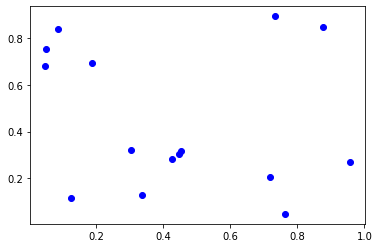

In [78]:
#definindo as cidades
n = 15
points = np.random.rand(n,2)
print (points)
for p in points:
  plt.plot(p[0],p[1],'bo') #plot x and y using blue circle markers

In [79]:

dist_matrix = [[np.linalg.norm(np.array(p1)-np.array(p2)) for p1 in points] for p2 in points]
dist_matrix

[[0.0,
  0.47551868576433864,
  0.18088309752697154,
  0.04353138345197651,
  0.030645667056572522,
  0.41117949047633967,
  0.6033792318530867,
  0.34506989727069765,
  0.718319611464042,
  0.651013748342453,
  0.3009227851904562,
  0.6821173095627304,
  0.528720928066552,
  0.12820354592218677,
  0.5480776363234365],
 [0.47551868576433864,
  0.0,
  0.5863700423645725,
  0.4602891812058806,
  0.46831456319865383,
  0.8664946958174978,
  0.14958069649436817,
  0.5802562438908546,
  0.7049143071604695,
  0.1759551363595463,
  0.7221198674011988,
  0.5825137504632972,
  0.8791192663474917,
  0.3908625046323335,
  0.13873427346434802],
 [0.18088309752697154,
  0.5863700423645725,
  0.0,
  0.22417810837027283,
  0.210725348225463,
  0.43443654154333916,
  0.6899768993299813,
  0.21187408456185047,
  0.8975862172837601,
  0.753782813858518,
  0.38846255214666164,
  0.8627688301577601,
  0.634765597137766,
  0.19683830202749775,
  0.6235237745106057],
 [0.04353138345197651,
  0.4602891812058

In [90]:
for i in range(len(dist_matrix)):
  dist_matrix[i][i] = np.inf #a distancia de uma cidade para ela mesma vai ser infinita para ser ignorada na minimização

n = len(points)
V = set(range(len(points)))

In [91]:
model = Model()


In [92]:
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
y = [model.add_var(var_type=INTEGER,lb=1,ub=n-1) for i in V]

In [93]:
model.objective = minimize(xsum(dist_matrix[i][j]*x[i][j] for i in V for j in V))


In [94]:
for i in V:
  model += xsum(x[i][j] for j in V - {i}) == 1 

for j in V:
  model += xsum(x[i][j] for i in V - {j}) == 1 

for (i, j) in product(V - {0}, V - {0}):
  if i!=j:
    model += y[i] - y[j] + (n+1)*x[i][j] <= n

In [95]:
model.optimize()
model.objective_value

In [82]:
# [0,1,2,3,4]
def tsp_perm(x):
  sum = 0
  for i in range(len(x)):
    sum += np.linalg.norm(points[x[i]] - points[x[(i+1)%len(x)]])

  return sum

In [89]:
def plot_perm(perm):
  best_solution = perm
  for i in range(len(best_solution)):
    px = [points[best_solution[i]][0],points[best_solution[(i+1)%len(best_solution)]][0]]
    py = [points[best_solution[i]][1],points[best_solution[(i+1)%len(best_solution)]][1]]
  
    plt.plot(px,py,'bo-')

In [87]:
def greedy_randomized(n, dist_matrix, prob=1):
  sol = [0] #vamos começar da cidade 0
  #usaremos como heuristica a proximidade dos vizinhos
  
  for i in range(1,n):
    cities = set(range(n)).difference(set(sol)) #subtração do conjunto de cidades, as cidades que já foram visitadas. Cities são as cidades disponíveis

    if np.random.rand() <=prob: #executa o guloso
      #para cada cidade disponível, precisamos ver as menores distâncias
      closest_val = np.inf
      closest_city = None
      for c in cities:
        dist = dist_matrix[sol[-1]][c] #a distancia da ultima cidade sol[-1] com a cidade c 
        if dist <= closest_val:
          closest_val = dist #atualiza a distancia
          closest_city = c #atualiza a cidade mais proxima
      sol.append(closest_city)
    
    else:
      sol.append(cities[np.random.randint(len(cities))])
  return sol

  


In [88]:
greedy = greedy_randomized(n,dist_matrix,prob=1)
print('{}, {} , Model: {}'.format(greedy,tsp_perm(greedy),model.objective_value))

[0, 4, 3, 13, 2, 7, 14, 6, 9, 1, 11, 8, 12, 10, 5], 3.6460806340433125 , Model: None


In [86]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

Agora vamos utilizar um algoritmo que seja uma heuristica de refinamento.